## for # FinalStrike

In [1]:
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("FinalStrike.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,retweet,favorite,inreplyto,friends,screen_name,followers,listed,retweeted_user,mentioned_user,mentions_sent,retweets_sent,content_type,date,country
0,0,0,5,0,NaN,32,himanshupuri313,30,0,indianprnk,"['indianprnk', 'narendramodi']",1,10,RT,2019-03-01,india
1,1,1,23,0,NaN,97,ImROOcky,2916,12,getazadi,['getazadi'],0,8,RT,2019-03-01,india
2,2,2,26,0,NaN,3363,mukundsinghs,5710,0,Dr_SimranSingh,['Dr_SimranSingh'],0,14,RT,2019-03-01,india
3,3,3,1110,0,NaN,118,MasoodAhmadK,33,0,BhittaniKhannnn,['BhittaniKhannnn'],0,15,RT,2019-03-01,pakistan
4,4,4,26,0,NaN,2262,ramnathjha7,1996,17,Dr_SimranSingh,['Dr_SimranSingh'],0,14,RT,2019-03-01,india


## Creating Network Features

In [3]:
df = df.sort_values(by=['screen_name'])

In [4]:
df['edge_value'] = 1

In [5]:
df = df[(df['content_type'] == "RT")]

In [6]:
df.shape

(4162, 17)

In [7]:
# creating new dataframe with just users and country
users_df = df[['screen_name','country']]
print(users_df.shape)
users_df.drop_duplicates(subset='screen_name',inplace=True)
print(users_df.shape)

(4162, 2)
(3352, 2)


In [8]:
g = nx.from_pandas_edgelist(df, source='screen_name', target='retweeted_user',edge_attr = 'edge_value',create_using=nx.DiGraph())
#g = nx.DiGraph()
#nx.draw(g)

In [9]:
degree = pd.DataFrame(nx.degree_centrality(g),index=['degree']).T.reset_index()
closeness = pd.DataFrame(nx.closeness_centrality(g),index=['closeness']).T.reset_index()
betweenness = pd.DataFrame(nx.betweenness_centrality(g),index=['betweenness']).T.reset_index()

In [10]:
#merging the dataset for scoring
df_m1 = df.groupby(['screen_name'])['mentions_sent','retweets_sent'].sum()
df_m2 = df.drop_duplicates(['screen_name'])[['screen_name','followers']]
df_m3 = pd.merge(df_m1,df_m2,how='inner',on='screen_name')

In [11]:
measures = degree.merge(closeness,on='index').merge(betweenness,on='index')
df_m4 = pd.merge(df_m3,measures,how='inner',left_on='screen_name',right_on = 'index')
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
0,0yee_h0yee,0,14,2524,0yee_h0yee,0.000267,0.0,0.0
1,12456ggxh,0,15,14,12456ggxh,0.000267,0.0,0.0
2,12surajsharma,0,10,88,12surajsharma,0.000267,0.0,0.0
3,1349Himanshu,0,12,59,1349Himanshu,0.000267,0.0,0.0
4,1989Avinash,0,10,31,1989Avinash,0.000267,0.0,0.0


In [12]:
df_m4.sort_values(by=['degree'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
83,AbidiAsfaq,0,10,7777,AbidiAsfaq,0.052533,0.052005,0.000000
842,MajorSaurabhSh1,348,455,2312,MajorSaurabhSh1,0.009600,0.000000,0.000000
1359,ShakkrPara,0,10,3122,ShakkrPara,0.007467,0.006933,0.000000
1614,Vishwan15684016,3,374,10,Vishwan15684016,0.007200,0.000000,0.000000
1003,NiteshFanaaS,39,305,16,NiteshFanaaS,0.006933,0.000000,0.000000
2187,gorinanu,23,228,1691,gorinanu,0.006400,0.000533,0.000003
814,MPS0999,70,363,3848,MPS0999,0.006400,0.000000,0.000000
1986,bjpmanishp,1,10,317,bjpmanishp,0.005867,0.005333,0.000000
380,DDalsher,4,383,86,DDalsher,0.005867,0.000000,0.000000
882,Mayavi101,1,9,3449,Mayavi101,0.005333,0.005079,0.000001


In [13]:
df_m4.sort_values(by=['closeness'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
83,AbidiAsfaq,0,10,7777,AbidiAsfaq,0.052533,0.052005,0.000000e+00
1359,ShakkrPara,0,10,3122,ShakkrPara,0.007467,0.006933,0.000000e+00
1986,bjpmanishp,1,10,317,bjpmanishp,0.005867,0.005333,0.000000e+00
882,Mayavi101,1,9,3449,Mayavi101,0.005333,0.005079,1.280341e-06
2245,iNitin_Patil,0,12,21245,iNitin_Patil,0.003200,0.002667,0.000000e+00
1880,ashupandit1999,0,14,2,ashupandit1999,0.002400,0.001867,0.000000e+00
1539,TruthRoars,5,13,18093,TruthRoars,0.001867,0.001633,3.556504e-07
1067,Plsuryawanshi,5,23,6030,Plsuryawanshi,0.001333,0.001089,7.113008e-08
1205,ReshmaNarkhede,0,23,2836,ReshmaNarkhede,0.001600,0.001067,4.979106e-07
1377,SherDil_Shaheen,0,14,9151,SherDil_Shaheen,0.001333,0.001067,2.845203e-07


In [14]:
df_m4.sort_values(by=['betweenness'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
2187,gorinanu,23,228,1691,gorinanu,0.006400,0.000533,3.200854e-06
882,Mayavi101,1,9,3449,Mayavi101,0.005333,0.005079,1.280341e-06
2783,prasadchaubal,9,60,1093,prasadchaubal,0.002400,0.000800,1.280341e-06
339,CJeet1989,5,90,34,CJeet1989,0.002133,0.000267,4.979106e-07
1205,ReshmaNarkhede,0,23,2836,ReshmaNarkhede,0.001600,0.001067,4.979106e-07
1539,TruthRoars,5,13,18093,TruthRoars,0.001867,0.001633,3.556504e-07
2800,priya_khapre,1,15,107,priya_khapre,0.000800,0.000711,2.845203e-07
1377,SherDil_Shaheen,0,14,9151,SherDil_Shaheen,0.001333,0.001067,2.845203e-07
2880,ravi7943,0,32,49,ravi7943,0.001067,0.000267,2.133902e-07
1609,VishalDholam,0,50,380,VishalDholam,0.001067,0.000267,2.133902e-07


In [16]:
#creating score by using standardized estimates from 
df_m4['score'] = 0.341642509 +  0.11145805 * df_m4['followers'] + 0.189455669 * df_m4['mentions_sent'] + 0.233242245 * df_m4['retweets_sent'] 
+ 0.095579394 * df_m4['betweenness'] - 0.028622133 * df_m4['closeness']
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
0,0yee_h0yee,0,14,2524,0yee_h0yee,0.000267,0.0,0.0,284.927152
1,12456ggxh,0,15,14,12456ggxh,0.000267,0.0,0.0,5.400689
2,12surajsharma,0,10,88,12surajsharma,0.000267,0.0,0.0,12.482373
3,1349Himanshu,0,12,59,1349Himanshu,0.000267,0.0,0.0,9.716574
4,1989Avinash,0,10,31,1989Avinash,0.000267,0.0,0.0,6.129265


In [17]:
df_m4.sort_values(by=['score'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
423,Dilsedesh,0,9,135208,Dilsedesh,0.000267,0.0,0.0,15072.460847
1875,ashokepandit,2,13,122880,ashokepandit,0.000267,0.0,0.0,13699.717887
2394,kapsology,0,12,120593,kapsology,0.000267,0.0,0.0,13444.201173
26,8429226x2244,0,15,82972,8429226x2244,0.000267,0.0,0.0,9251.737601
2178,geetv79,0,12,79019,geetv79,0.000267,0.0,0.0,8810.444202
2351,jeetensingh,0,12,76716,jeetensingh,0.000267,0.0,0.0,8553.756313
674,JhaGunjesh,0,75,71712,JhaGunjesh,0.000267,0.0,0.0,8010.714492
3215,tweepakistan,0,15,64526,tweepakistan,0.000267,0.0,0.0,7195.782410
429,Dinu_speaks,0,13,64005,Dinu_speaks,0.000267,0.0,0.0,7137.246282
2774,pragnik,1,22,55728,pragnik,0.000533,0.0,0.0,6216.996638


In [18]:
df.shape

(4162, 17)

In [19]:
col1 = df['screen_name']
col2 = df['retweeted_user']
col3 = df['content_type']
network = pd.concat([col1, col2, col3], axis=1)


network.columns = ['User_A', 'User_B', 'Interaction']
network.head()

,User_A,User_B,Interaction
720,0yee_h0yee,voicenewspk479,RT
2507,12456ggxh,BhittaniKhannnn,RT
2816,12surajsharma,AbidiAsfaq,RT
3121,1349Himanshu,SwamiGeetika,RT
1368,1989Avinash,AbidiAsfaq,RT


In [20]:
all_people = list(network['User_A'].unique())
all_people = all_people + list(network['User_B'].unique())

In [21]:
print (len(all_people))
all_people = list(set(all_people))
print('Length after removing duplicates', len(all_people))

3816
Length after removing duplicates 3751


In [22]:
g1 = nx.Graph()

In [23]:
for k in all_people:
    g1.add_node(k)

In [24]:
for i in range(len(network)):
    g1.add_edge(network['User_A'].iloc[i], network['User_B'].iloc[i])

In [25]:
# plt.figure(1,figsize=(15,15)) 
# nx.draw_networkx(g1,with_labels = False, node_size = 30)
# plt.show()

# Experimenting with Cores and Cliques

In [26]:
list(nx.find_cliques(g1))

[['Kaia1996', 'Independentnexu'],
 ['SALAAREMUHAMMAD', 'HinaKharal'],
 ['SALAAREMUHAMMAD', 'EimanMalikPak'],
 ['vatgujaratni', 'aachaudhari21'],
 ['Vish54708850', 'talkshekhar'],
 ['justinreshma96', 'Amitkalraj'],
 ['gargm1974', 'TheAshokSingh'],
 ['gargm1974', 'JhaRahul_Bihar'],
 ['DarahuaIndian', 'republic'],
 ['Jawad_Naqvi23', 'BhittaniKhannnn'],
 ['VazeIndian', 'SanjayV_INC'],
 ['VazeIndian', 'Mathewschacko'],
 ['rakeshnayak10', 'AbidiAsfaq'],
 ['robo275766676', 'TruthSeekerNiki'],
 ['beingriazshq', 'BhittaniKhannnn'],
 ['iimmuus', 'imMAK02'],
 ['SharadaK18', 'samirsinh189'],
 ['SharadaK18', 'pradeepksm2272'],
 ['AstroSahni', 'nageenshekhawat'],
 ['mrsunny420', 'AbidiAsfaq'],
 ['Sandeep32203888', 'mvadera'],
 ['Shivamr66978825', 'republic'],
 ['HinaBai50000602', 'BhittaniKhannnn'],
 ['Indian2410', 'HaftaWasooli'],
 ['SourabDey4', 'Iamashuupadhyay'],
 ['HarfanMaullah', 'AbidiAsfaq'],
 ['97vikashyadav', 'Moushamiveera'],
 ['ImAbidBaloch', 'siasipakistani'],
 ['Aas8isb', 'BhittaniKhan

In [27]:
# remove the self loops

g1.remove_edges_from(nx.selfloop_edges(g1))

#let's find the cores
list(nx.k_core(g1))
#nx.core_number(g)

['da_watan_lewany',
 'TruthSeekerNiki',
 'ManishSahgal',
 'DDalsher',
 'mihirnagarkar',
 'Nivassinh',
 'gorinanu',
 'cksinha',
 'supriyaishwad',
 'samirsinh189',
 'Commerce_keeda',
 'BhittaniKhannnn',
 'jyotisuchith',
 'rokul59',
 'NavarkarVedant',
 'antrini123',
 'MPS0999',
 'kiran_madane',
 'bhuvansb',
 'santoshsadafule',
 'akshataveera123',
 'advsarang',
 'republic',
 'lavina_majumdar',
 'ReshmaNarkhede',
 'AmmarAh910',
 'AbidiAsfaq',
 'TheNotorious112',
 'SirJadeja',
 'ashupandit1999',
 'schaheid',
 'imMAK02',
 'mahajan_hareesh',
 'Suresh_Kridaksh',
 'ManojPretam',
 'nikenitesh4',
 'srtalak',
 'samroo12',
 'krishnatripurab',
 'mirfan_59',
 'kktotlani',
 'shaddad_marwat',
 'Moushamiveera',
 'MajorSaurabhSh1',
 'NBhalwankar',
 'pratima_parab',
 'VU3SDZ',
 'archer_004',
 'supriyaseril',
 'yousafzi_001',
 'ashutosh147',
 'khalidbinbashir',
 'ravi7943',
 'Bhupesh_live',
 'BortamuliNath',
 'annapara',
 'mahesh2586',
 'SwamiGeetika',
 'shsony',
 'SarinPradeep1',
 'Mr_GRMore',
 'itzzkaj_',

In [28]:
# finding all users considered to have a core value
nx.core_number(g1)

{'Kaia1996': 1,
 'SALAAREMUHAMMAD': 2,
 'Vish54708850': 1,
 'justinreshma96': 1,
 'vatgujaratni': 1,
 'gargm1974': 2,
 'DarahuaIndian': 1,
 'Jawad_Naqvi23': 1,
 'VazeIndian': 1,
 'rakeshnayak10': 1,
 'robo275766676': 1,
 'beingriazshq': 1,
 'SharadaK18': 2,
 'AstroSahni': 1,
 'Sandeep32203888': 1,
 'Shivamr66978825': 1,
 'iimmuus': 1,
 'mrsunny420': 1,
 'HinaBai50000602': 1,
 'Indian2410': 1,
 'SourabDey4': 1,
 'HarfanMaullah': 1,
 '97vikashyadav': 1,
 'ImAbidBaloch': 1,
 'Aas8isb': 1,
 'Arpit_Harsola': 1,
 'Commerce_keeda': 3,
 'MDRiyad82598715': 1,
 'SunilHindustaa2': 1,
 'VasavadaMalay': 1,
 'abhisekpaliwal8': 1,
 'AyanMuk88516954': 1,
 'SahilKh59142190': 1,
 'aakashs48': 1,
 'dunknownguy': 1,
 'Sehrishmaliks': 1,
 'AbdulKa12892717': 1,
 'SRajwadka': 2,
 'DARKMATTER1008': 1,
 'VivekTivari': 1,
 'Anand_sinh': 2,
 'cd9fe9adf10a4ab': 1,
 'MaheshS31354071': 1,
 'HariomDass4': 2,
 'MNGzoomin': 1,
 'MuneebQureshi67': 1,
 'Nikitas73199810': 1,
 'sag_tarkhala': 1,
 'Javed2k': 1,
 'Ali_Raajp

In [47]:
# finding users with the highest core value

d = {k: v for k, v in nx.core_number(g1).items() if v > 2}
core_df = pd.DataFrame()
core_df['user'] = d.keys()
core_df['core'] = d.values()
core_df = pd.merge(core_df, users_df, left_on='user', right_on='screen_name', how='inner')
core_df = core_df.drop('screen_name', axis=1)
print('number of cores of 3 value: ' + str(len(core_df)))

core_df

number of cores of 3 value: 55


,user,core,country
0,Commerce_keeda,3,india
1,mirfan_59,3,sargodha
2,MajorSaurabhSh1,3,india
3,Suresh_Kridaksh,3,dc
4,nikenitesh4,3,No location
5,ashutosh147,3,india
6,ReshmaNarkhede,3,india
7,shaddad_marwat,3,pakistan
8,supriyaseril,3,india
9,NavarkarVedant,3,india


In [39]:
core_df['country'].value_counts()

india                       25
No location                 10
pakistan                     3
mumbai                       3
earth                        2
mumbai / new delhi           1
sargodha                     1
pune                         1
delhi                        1
hearts of my friends         1
islamabad                    1
dc                           1
normandy sr2                 1
xenomorph planet             1
الامارات العربية المتحدة     1
भारत गणराज्य                 1
worldwide                    1
Name: country, dtype: int64

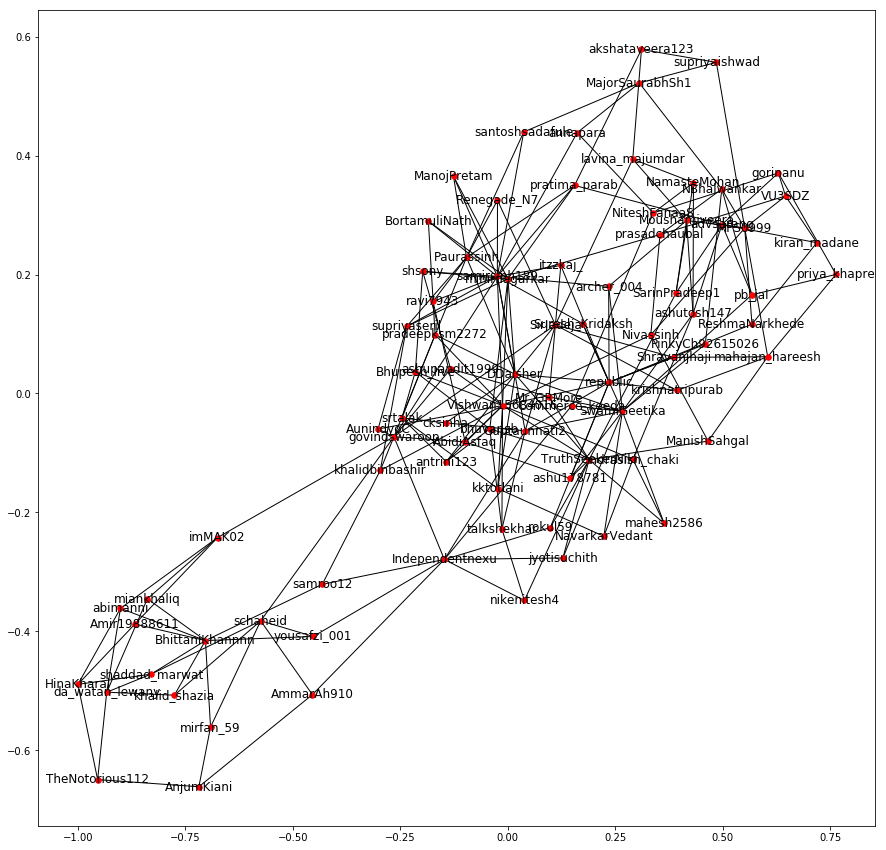

In [40]:
# plotting the cores
plt.figure(1,figsize=(15,15)) 
nx.draw_networkx(nx.k_core(g1),with_labels = True, node_size = 30)
plt.show()

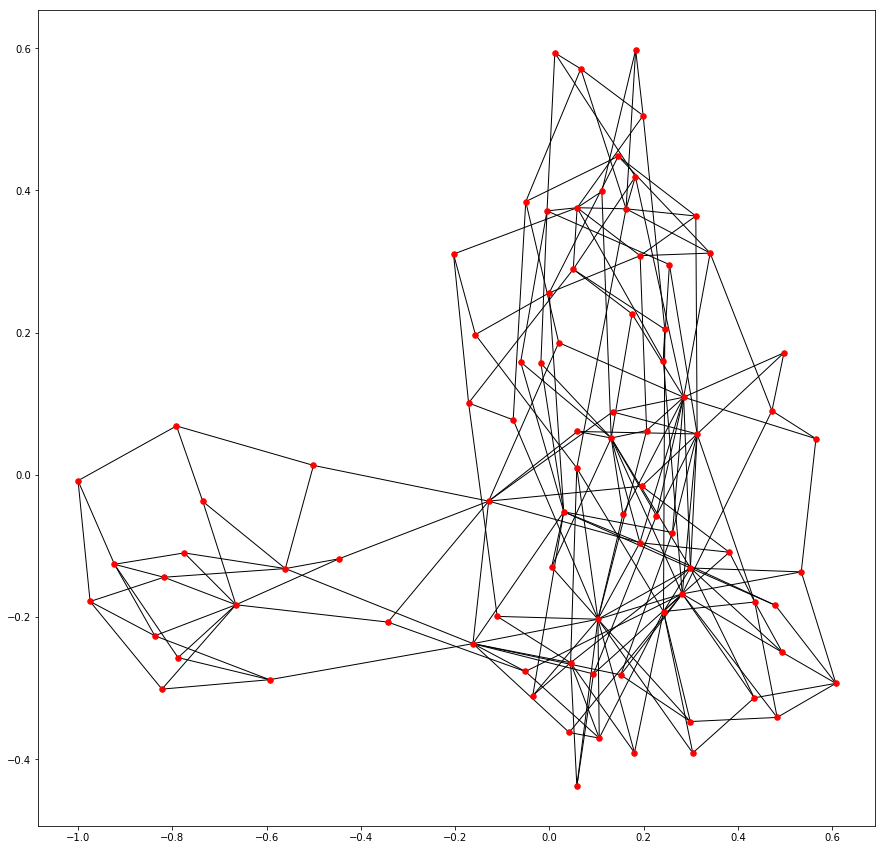

In [32]:
# plotting the cores
plt.figure(1,figsize=(15,15)) 
nx.draw_networkx(nx.k_core(g1),with_labels = False, node_size = 30)
plt.show()